In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# Create engine.#Use SQLAlchemy create_engine to connect to your sqlite database.
hawaii_path = "../Resources/hawaii.sqlite"
#hawaii_engine = create_engine(f"sqlite:///{database_path}")
engine_hawaii = create_engine(f"sqlite:///{hawaii_path}")
hawaii_measure = pd.read_sql("SELECT * FROM measurement", engine_hawaii)
hawaii_measure.head()
#hawaii_measure.head(10)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [7]:
hawaii_station = pd.read_sql("SELECT * FROM station", engine_hawaii)
hawaii_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [8]:
Base = automap_base()

In [9]:
Base.prepare(engine_hawaii, reflect=True)

In [10]:
Base.classes.keys()

['measurement', 'station']

In [11]:
measurement = Base.classes.measurement

In [12]:
station = Base.classes.station

In [13]:
session = Session(engine_hawaii)

In [14]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x9fc1a58>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08}

In [15]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x9fdd780>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

precips = session.query(measurement.date, measurement.prcp, measurement.station, measurement.tobs)



for precip in precips:
    print (precip)

#precips = session.query(measurement).filter_by(date 
#for precip in precips:
    #print(precip.prcp)

('2010-01-01', 0.08, 'USC00519397', 65.0)
('2010-01-02', 0.0, 'USC00519397', 63.0)
('2010-01-03', 0.0, 'USC00519397', 74.0)
('2010-01-04', 0.0, 'USC00519397', 76.0)
('2010-01-06', None, 'USC00519397', 73.0)
('2010-01-07', 0.06, 'USC00519397', 70.0)
('2010-01-08', 0.0, 'USC00519397', 64.0)
('2010-01-09', 0.0, 'USC00519397', 68.0)
('2010-01-10', 0.0, 'USC00519397', 73.0)
('2010-01-11', 0.01, 'USC00519397', 64.0)
('2010-01-12', 0.0, 'USC00519397', 61.0)
('2010-01-14', 0.0, 'USC00519397', 66.0)
('2010-01-15', 0.0, 'USC00519397', 65.0)
('2010-01-16', 0.0, 'USC00519397', 68.0)
('2010-01-17', 0.0, 'USC00519397', 64.0)
('2010-01-18', 0.0, 'USC00519397', 72.0)
('2010-01-19', 0.0, 'USC00519397', 66.0)
('2010-01-20', 0.0, 'USC00519397', 66.0)
('2010-01-21', 0.0, 'USC00519397', 69.0)
('2010-01-22', 0.0, 'USC00519397', 67.0)
('2010-01-23', 0.0, 'USC00519397', 67.0)
('2010-01-24', 0.01, 'USC00519397', 71.0)
('2010-01-25', 0.0, 'USC00519397', 67.0)
('2010-01-26', 0.04, 'USC00519397', 76.0)
('2010-01-

('2015-04-30', 0.0, 'USC00519397', 77.0)
('2015-05-01', 0.06, 'USC00519397', 75.0)
('2015-05-02', 0.0, 'USC00519397', 76.0)
('2015-05-03', 0.0, 'USC00519397', 76.0)
('2015-05-04', 0.0, 'USC00519397', 76.0)
('2015-05-05', 0.05, 'USC00519397', 77.0)
('2015-05-06', 0.03, 'USC00519397', 75.0)
('2015-05-07', 0.01, 'USC00519397', 77.0)
('2015-05-08', 0.18, 'USC00519397', 73.0)
('2015-05-09', 0.05, 'USC00519397', 76.0)
('2015-05-10', 0.0, 'USC00519397', 76.0)
('2015-05-11', 0.0, 'USC00519397', 76.0)
('2015-05-12', 0.01, 'USC00519397', 74.0)
('2015-05-13', 0.0, 'USC00519397', 76.0)
('2015-05-14', 0.0, 'USC00519397', 76.0)
('2015-05-15', 0.13, 'USC00519397', 74.0)
('2015-05-16', 0.0, 'USC00519397', 76.0)
('2015-05-17', 0.0, 'USC00519397', 77.0)
('2015-05-18', 0.0, 'USC00519397', 77.0)
('2015-05-19', 0.0, 'USC00519397', 76.0)
('2015-05-20', 0.0, 'USC00519397', 76.0)
('2015-05-21', 0.0, 'USC00519397', 77.0)
('2015-05-22', 0.0, 'USC00519397', 75.0)
('2015-05-23', 0.07, 'USC00519397', 75.0)
('2015-

('2011-11-09', 0.03, 'USC00513117', 74.0)
('2011-11-10', 0.04, 'USC00513117', 74.0)
('2011-11-11', 0.16, 'USC00513117', 75.0)
('2011-11-12', 0.07, 'USC00513117', 73.0)
('2011-11-13', 0.01, 'USC00513117', 69.0)
('2011-11-14', 0.0, 'USC00513117', 71.0)
('2011-11-15', 0.0, 'USC00513117', 70.0)
('2011-11-16', 0.0, 'USC00513117', 74.0)
('2011-11-17', 0.01, 'USC00513117', 75.0)
('2011-11-18', 0.04, 'USC00513117', 74.0)
('2011-11-19', 0.03, 'USC00513117', 74.0)
('2011-11-20', 0.02, 'USC00513117', 74.0)
('2011-11-21', 0.38, 'USC00513117', 74.0)
('2011-11-22', 0.03, 'USC00513117', 74.0)
('2011-11-23', 0.08, 'USC00513117', 74.0)
('2011-11-24', 0.0, 'USC00513117', 73.0)
('2011-11-25', 0.05, 'USC00513117', 71.0)
('2011-11-26', 0.0, 'USC00513117', 74.0)
('2011-11-27', 0.07, 'USC00513117', 72.0)
('2011-11-28', 0.0, 'USC00513117', 71.0)
('2011-11-29', 0.03, 'USC00513117', 72.0)
('2011-11-30', 0.36, 'USC00513117', 66.0)
('2011-12-01', 0.11, 'USC00513117', 69.0)
('2011-12-02', 0.14, 'USC00513117', 68.0

('2016-01-27', 0.0, 'USC00513117', 71.0)
('2016-01-28', 0.0, 'USC00513117', 68.0)
('2016-01-29', 0.0, 'USC00513117', 69.0)
('2016-01-30', 0.0, 'USC00513117', 67.0)
('2016-01-31', 0.0, 'USC00513117', 72.0)
('2016-02-01', 0.0, 'USC00513117', 78.0)
('2016-02-02', 0.41, 'USC00513117', 68.0)
('2016-02-03', 0.25, 'USC00513117', 71.0)
('2016-02-04', 0.0, 'USC00513117', 70.0)
('2016-02-05', 0.0, 'USC00513117', 70.0)
('2016-02-06', 0.0, 'USC00513117', 75.0)
('2016-02-07', 0.16, 'USC00513117', 71.0)
('2016-02-08', 0.0, 'USC00513117', 74.0)
('2016-02-09', 0.0, 'USC00513117', 66.0)
('2016-02-10', 0.0, 'USC00513117', 63.0)
('2016-02-11', 0.0, 'USC00513117', 72.0)
('2016-02-12', 0.07, 'USC00513117', 74.0)
('2016-02-13', 0.02, 'USC00513117', 75.0)
('2016-02-14', 0.0, 'USC00513117', 74.0)
('2016-02-15', 0.0, 'USC00513117', 79.0)
('2016-02-16', 0.05, 'USC00513117', 75.0)
('2016-02-17', 0.1, 'USC00513117', 73.0)
('2016-02-18', 0.02, 'USC00513117', 74.0)
('2016-02-19', 0.11, 'USC00513117', 69.0)
('2016-0

('2015-03-16', None, 'USC00514830', 74.0)
('2015-03-17', 0.0, 'USC00514830', 73.0)
('2015-03-18', 0.0, 'USC00514830', 73.0)
('2015-03-19', 0.0, 'USC00514830', 70.0)
('2015-03-20', 0.02, 'USC00514830', 72.0)
('2015-03-22', None, 'USC00514830', 77.0)
('2015-03-23', 0.0, 'USC00514830', 76.0)
('2015-03-24', 0.13, 'USC00514830', 75.0)
('2015-03-25', 0.08, 'USC00514830', 75.0)
('2015-03-26', 0.05, 'USC00514830', 71.0)
('2015-03-29', None, 'USC00514830', 74.0)
('2015-03-30', 0.14, 'USC00514830', 76.0)
('2015-03-31', 0.35, 'USC00514830', 77.0)
('2015-04-01', 0.03, 'USC00514830', 75.0)
('2015-04-02', 0.0, 'USC00514830', 75.0)
('2015-04-03', 0.0, 'USC00514830', 77.0)
('2015-04-05', None, 'USC00514830', 77.0)
('2015-04-06', 0.06, 'USC00514830', 76.0)
('2015-04-07', 0.0, 'USC00514830', 75.0)
('2015-04-08', 0.08, 'USC00514830', 76.0)
('2015-04-09', 0.14, 'USC00514830', 77.0)
('2015-04-10', 0.0, 'USC00514830', 75.0)
('2015-04-11', 0.0, 'USC00514830', 74.0)
('2015-04-12', 0.01, 'USC00514830', 76.0)
(

('2014-04-10', 0.0, 'USC00517948', 68.0)
('2014-04-11', 0.0, 'USC00517948', 72.0)
('2014-04-14', None, 'USC00517948', 73.0)
('2014-04-15', None, 'USC00517948', 73.0)
('2014-04-16', 0.06, 'USC00517948', 74.0)
('2014-04-17', None, 'USC00517948', 74.0)
('2014-04-21', None, 'USC00517948', 75.0)
('2014-04-22', 0.09, 'USC00517948', 77.0)
('2014-04-23', 0.0, 'USC00517948', 77.0)
('2014-04-24', 0.0, 'USC00517948', 76.0)
('2014-04-28', None, 'USC00517948', 74.0)
('2014-04-29', None, 'USC00517948', 74.0)
('2014-05-02', 0.0, 'USC00517948', 78.0)
('2014-05-05', None, 'USC00517948', 79.0)
('2014-05-06', 0.72, 'USC00517948', 76.0)
('2014-05-07', 0.03, 'USC00517948', 76.0)
('2014-05-08', None, 'USC00517948', 77.0)
('2014-05-09', None, 'USC00517948', 77.0)
('2014-05-12', None, 'USC00517948', 74.0)
('2014-05-13', None, 'USC00517948', 74.0)
('2014-05-14', 0.0, 'USC00517948', 75.0)
('2014-05-15', 0.0, 'USC00517948', 76.0)
('2014-05-16', 0.0, 'USC00517948', 78.0)
('2014-05-19', None, 'USC00517948', 79.0)


('2011-07-19', 0.0, 'USC00519523', 75.0)
('2011-07-20', 0.16, 'USC00519523', 71.0)
('2011-07-21', 0.0, 'USC00519523', 77.0)
('2011-07-22', 0.09, 'USC00519523', 75.0)
('2011-07-23', 0.08, 'USC00519523', 77.0)
('2011-07-24', 0.0, 'USC00519523', 74.0)
('2011-07-25', 0.12, 'USC00519523', 76.0)
('2011-07-26', 0.0, 'USC00519523', 76.0)
('2011-07-27', 0.06, 'USC00519523', 75.0)
('2011-07-28', 0.04, 'USC00519523', 76.0)
('2011-07-29', 0.02, 'USC00519523', 77.0)
('2011-07-30', 0.2, 'USC00519523', 76.0)
('2011-07-31', 0.01, 'USC00519523', 78.0)
('2011-08-01', 0.0, 'USC00519523', 76.0)
('2011-08-02', 0.0, 'USC00519523', 76.0)
('2011-08-03', 0.0, 'USC00519523', 77.0)
('2011-08-04', 0.0, 'USC00519523', 77.0)
('2011-08-05', 0.0, 'USC00519523', 77.0)
('2011-08-06', 0.0, 'USC00519523', 76.0)
('2011-08-07', 0.12, 'USC00519523', 77.0)
('2011-08-08', 0.0, 'USC00519523', 76.0)
('2011-08-09', 0.19, 'USC00519523', 78.0)
('2011-08-10', 0.0, 'USC00519523', 76.0)
('2011-08-11', 0.0, 'USC00519523', 76.0)
('2011

('2016-09-22', 0.01, 'USC00519523', 79.0)
('2016-09-23', 0.0, 'USC00519523', 80.0)
('2016-09-24', 0.0, 'USC00519523', 83.0)
('2016-09-25', 0.0, 'USC00519523', 82.0)
('2016-09-26', 0.34, 'USC00519523', 78.0)
('2016-09-27', 0.05, 'USC00519523', 78.0)
('2016-09-28', 0.0, 'USC00519523', 78.0)
('2016-09-29', 0.18, 'USC00519523', 82.0)
('2016-09-30', 0.15, 'USC00519523', 78.0)
('2016-10-01', 0.07, 'USC00519523', 79.0)
('2016-10-02', 0.0, 'USC00519523', 81.0)
('2016-10-03', 0.0, 'USC00519523', 79.0)
('2016-10-04', 0.0, 'USC00519523', 80.0)
('2016-10-05', 0.0, 'USC00519523', 80.0)
('2016-10-06', 0.0, 'USC00519523', 80.0)
('2016-10-07', 0.0, 'USC00519523', 79.0)
('2016-10-08', 0.0, 'USC00519523', 82.0)
('2016-10-09', 0.0, 'USC00519523', 80.0)
('2016-10-10', 0.0, 'USC00519523', 78.0)
('2016-10-11', 0.0, 'USC00519523', 81.0)
('2016-10-12', 0.0, 'USC00519523', 81.0)
('2016-10-13', 0.0, 'USC00519523', 79.0)
('2016-10-14', 0.0, 'USC00519523', 80.0)
('2016-10-15', 0.0, 'USC00519523', 79.0)
('2016-10-

('2014-02-11', 0.0, 'USC00519281', 62.0)
('2014-02-12', 0.01, 'USC00519281', 66.0)
('2014-02-13', 0.0, 'USC00519281', 66.0)
('2014-02-14', 0.1, 'USC00519281', 71.0)
('2014-02-15', 0.43, 'USC00519281', 71.0)
('2014-02-16', 0.63, 'USC00519281', 71.0)
('2014-02-17', 0.31, 'USC00519281', 73.0)
('2014-02-18', 0.11, 'USC00519281', 74.0)
('2014-02-19', 0.0, 'USC00519281', 72.0)
('2014-02-20', 0.01, 'USC00519281', 68.0)
('2014-02-21', 0.0, 'USC00519281', 68.0)
('2014-02-22', 0.53, 'USC00519281', 67.0)
('2014-02-23', 0.06, 'USC00519281', 71.0)
('2014-02-24', 0.01, 'USC00519281', 64.0)
('2014-02-25', 0.01, 'USC00519281', 64.0)
('2014-02-26', 0.01, 'USC00519281', 62.0)
('2014-02-27', 0.03, 'USC00519281', 63.0)
('2014-02-28', 0.02, 'USC00519281', 67.0)
('2014-03-01', 0.35, 'USC00519281', 70.0)
('2014-03-02', 0.28, 'USC00519281', 68.0)
('2014-03-03', 0.28, 'USC00519281', 62.0)
('2014-03-04', 0.0, 'USC00519281', 57.0)
('2014-03-05', 0.0, 'USC00519281', 61.0)
('2014-03-06', 0.0, 'USC00519281', 60.0)


('2011-02-27', 0.0, 'USC00511918', 67.0)
('2011-02-28', 0.0, 'USC00511918', 65.0)
('2011-03-01', 0.0, 'USC00511918', 64.0)
('2011-03-02', 0.0, 'USC00511918', 61.0)
('2011-03-03', 0.03, 'USC00511918', 72.0)
('2011-03-04', 0.6, 'USC00511918', 73.0)
('2011-03-06', 0.0, 'USC00511918', 73.0)
('2011-03-07', 0.03, 'USC00511918', 76.0)
('2011-03-08', 0.0, 'USC00511918', 66.0)
('2011-03-09', 0.01, 'USC00511918', 69.0)
('2011-03-10', 0.1, 'USC00511918', 69.0)
('2011-03-11', 0.04, 'USC00511918', 79.0)
('2011-03-12', 0.0, 'USC00511918', 77.0)
('2011-03-13', 0.01, 'USC00511918', 72.0)
('2011-03-14', 0.0, 'USC00511918', 63.0)
('2011-03-15', 0.0, 'USC00511918', 73.0)
('2011-03-16', 0.0, 'USC00511918', 75.0)
('2011-03-18', 0.0, 'USC00511918', 72.0)
('2011-03-19', 0.0, 'USC00511918', 75.0)
('2011-03-20', 0.06, 'USC00511918', 73.0)
('2011-03-21', 0.0, 'USC00511918', 69.0)
('2011-03-22', 0.01, 'USC00511918', 70.0)
('2011-03-23', 0.0, 'USC00511918', 72.0)
('2011-03-24', 0.0, 'USC00511918', 71.0)
('2011-03

('2015-07-06', None, 'USC00511918', 71.0)
('2015-07-08', None, 'USC00511918', 77.0)
('2015-07-09', 0.0, 'USC00511918', 76.0)
('2015-07-10', 0.0, 'USC00511918', 73.0)
('2015-07-13', None, 'USC00511918', 77.0)
('2015-07-14', 0.0, 'USC00511918', 75.0)
('2015-07-15', 0.0, 'USC00511918', 71.0)
('2015-07-16', 0.0, 'USC00511918', 75.0)
('2015-07-17', 0.0, 'USC00511918', 75.0)
('2015-07-21', None, 'USC00511918', 72.0)
('2015-07-22', 0.0, 'USC00511918', 77.0)
('2015-07-23', 0.0, 'USC00511918', 71.0)
('2015-07-24', 0.0, 'USC00511918', 77.0)
('2015-07-27', None, 'USC00511918', 72.0)
('2015-07-28', 0.0, 'USC00511918', 74.0)
('2015-07-30', None, 'USC00511918', 78.0)
('2015-07-31', 0.0, 'USC00511918', 82.0)
('2015-08-03', None, 'USC00511918', 85.0)
('2015-08-04', 0.0, 'USC00511918', 84.0)
('2015-08-05', 0.1, 'USC00511918', 76.0)
('2015-08-06', 0.0, 'USC00511918', 76.0)
('2015-08-13', None, 'USC00511918', 76.0)
('2015-08-14', 0.0, 'USC00511918', 78.0)
('2015-08-17', None, 'USC00511918', 73.0)
('2015-

('2015-09-05', 0.06, 'USC00516128', 79.0)
('2015-09-06', 0.02, 'USC00516128', 74.0)
('2015-09-07', 0.32, 'USC00516128', 76.0)
('2015-09-08', 0.29, 'USC00516128', 79.0)
('2015-09-09', 0.0, 'USC00516128', 78.0)
('2015-09-10', 0.0, 'USC00516128', 76.0)
('2015-09-11', 0.52, 'USC00516128', 75.0)
('2015-09-12', 2.44, 'USC00516128', 76.0)
('2015-09-13', 0.79, 'USC00516128', 76.0)
('2015-09-14', 2.57, 'USC00516128', 75.0)
('2015-09-15', 6.83, 'USC00516128', 73.0)
('2015-09-16', 2.5, 'USC00516128', 76.0)
('2015-09-17', 0.28, 'USC00516128', 75.0)
('2015-09-18', 0.37, 'USC00516128', 75.0)
('2015-09-19', 0.21, 'USC00516128', 76.0)
('2015-09-20', 0.26, 'USC00516128', 74.0)
('2015-09-21', 1.43, 'USC00516128', 75.0)
('2015-09-22', 1.29, 'USC00516128', 76.0)
('2015-09-23', 0.58, 'USC00516128', 73.0)
('2015-09-24', 1.3, 'USC00516128', 72.0)
('2015-09-25', 0.54, 'USC00516128', 73.0)
('2015-09-26', 1.02, 'USC00516128', 76.0)
('2015-09-27', 1.72, 'USC00516128', 73.0)
('2015-09-28', 4.18, 'USC00516128', 72

In [18]:
precip_df = pd.DataFrame(precips, columns=["date", "prcp", "station","tobs"])

#precip_df.set_index("date", inplace = True)
                                           
precip_df.head()

,date,prcp,station,tobs
0,2010-01-01,0.08,USC00519397,65.0
1,2010-01-02,0.00,USC00519397,63.0
2,2010-01-03,0.00,USC00519397,74.0
3,2010-01-04,0.00,USC00519397,76.0
4,2010-01-06,NaN,USC00519397,73.0


In [19]:
# Calculate the date 1 year ago from the last data point in the database

year_ago = dt.date(2016, 8, 23) - dt.timedelta(days = 365)
print (year_ago)

2015-08-24


In [20]:
#(measurement.date, measurement.prcp).\
#year_data = session.query(Measurement.prcp).filter(Measurement.date > 'year_ago').all()

#year_data

year_data = precip_df.loc[precip_df["date"] > '2015-08-24']
year_data.head()



#naep1_df = naep_df.loc[(naep_df['YEAR'] ==2003)

,date,prcp,station,tobs
1999,2015-08-25,0.20,USC00519397,79.0
2000,2015-08-26,0.62,USC00519397,77.0
2001,2015-08-27,0.62,USC00519397,77.0
2002,2015-08-28,0.06,USC00519397,81.0
2003,2015-08-29,0.00,USC00519397,82.0


In [21]:
year_data_df = pd.DataFrame(year_data)

year_sorted = year_data_df.sort_values("date")

year_sorted_df = pd.DataFrame(year_sorted)

year_sorted_df.head()



,date,prcp,station,tobs
1999,2015-08-25,0.20,USC00519397,79.0
16905,2015-08-25,1.30,USC00511918,79.0
7012,2015-08-25,0.13,USC00514830,82.0
11515,2015-08-25,0.12,USC00519523,80.0
4729,2015-08-25,0.52,USC00513117,76.0


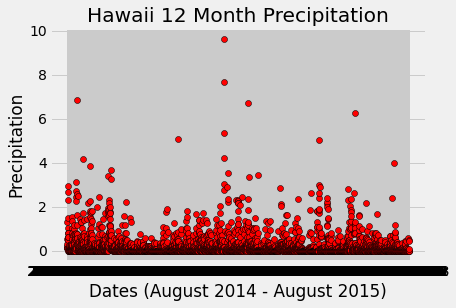

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data

#plt = year_sorted_df.plot.bar()

prcp1 = year_sorted_df["prcp"]
date1 = year_sorted_df["date"]

plt.scatter(date1, prcp1, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Hawaii 12 Month Precipitation")
plt.xlabel("Dates (August 2014 - August 2015)")
plt.ylabel("Precipitation")


plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data

mean_prcp = year_sorted_df['prcp'].mean
print (f"The mean precipitation for Hawaii over one year is {mean_prcp}")
#year_sorted_df

#What in the world?

The mean precipitation for Hawaii over one year is <bound method Series.mean of 1999     0.20
16905    1.30
7012     0.13
11515    0.12
4729     0.52
         ... 
19548    0.50
7634     0.00
2723     0.00
12186    0.08
19549    0.45
Name: prcp, Length: 4559, dtype: float64>


In [27]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(measurement).group_by(measurement.station).count()
print (station_count)



9


In [29]:
results = [measurement.prcp,
          func.count(measurement.date)]

prcp_results = session.query(*results).group_by(measurement.station).order_by(measurement.station).all()

prcp_results

[(0.05, 1979),
 (0.28, 2709),
 (0.01, 2202),
 (0.14, 2612),
 (None, 1372),
 (0.21, 511),
 (0.15, 2772),
 (0.08, 2724),
 (0.15, 2669)]

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#results = session.query(Measurement).filter(Measurement.id ==1).count()



one = session.query(measurement).filter(measurement.station == 'USC00519397').count()
print (one)
two = session.query(measurement).filter(measurement.station == 'USC00513117').count()
print (two)
three = session.query(measurement).filter(measurement.station == 'USC00514830').count()
print (three)
four = session.query(measurement).filter(measurement.station == 'USC00517948').count()
print (four)
five = session.query(measurement).filter(measurement.station == 'USC00518838').count()
print (five)
six = session.query(measurement).filter(measurement.station == 'USC00519523').count()
print (six)
seven = session.query(measurement).filter(measurement.station == 'USC00519281').count()
print (seven)
eight = session.query(measurement).filter(measurement.station == 'USC00511918').count()
print (eight)
nine = session.query(measurement).filter(measurement.station == 'USC00516128').count()
print (nine)
#print (newlist)



#engine.execute (COUNT station AS "stations"
#FROM Measurement
#GROUP BY station
#ORDER BY "stations" DESC;)

#stations = session.query(station).func.
#FROM measurement
#GROUP BY station
#ORDER BY "stations" DESC;


2724
2709
2202
1372
511
2669
2772
1979
2612


In [ ]:

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#Station ID = 9281

temp_low = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').order_by(measurement.tobs).first()

print (temp_low)

temp_high = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').order_by(measurement.tobs.desc()).first()
print (temp_high)

temp_ave = [func.avg(measurement.tobs)]

temp_ave_active = session.query(*temp_ave).\
    filter(measurement.station == 'USC00519281').all()

print (temp_ave_active)

#temp_ave = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').func.avg(Measurement.tobs)

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_data_active = precip_df.loc[(precip_df["date"] > '2015-08-24') & (precip_df["station"] == 'USC00519281')]
year_data_active.head()

active_df = pd.DataFrame(year_data_active)

#mathscoresgrade4 = naep1_new.loc[(naep_df["TEST_SUBJECT"] == 'Mathematics') & (naep1_new['TEST_YEAR']==4)]

#REDO THIS AS QUERY

In [ ]:
plt.hist(active_df)
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.show()




## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
